## Random Forest Regression


### Regression 
#### Regression searches for relationships among variables, you need regression to answer whether and how some phenomenon influences the other or how several variables are related, uses the relationship between the variables x and y to find the best way to draw a line through the data points.
---

### Random Forest
#### The fundamental idea behind a random forest is to combine many decision trees into a single model. Individually, predictions made by decision trees (or humans) may not be accurate, but combined together, the predictions will be closer to the mark on average. 

#### Pros 
- can handle large datasets 
- less influenced by outliers in the data
- no assumptions about underlying distributions in the data
- can implicitly handle collinearity in features, highly similar features 
- work well with heterogeneous features, categorical and numerical, mixing different range values 

#### Cons
- robust algorithm makes it more complex tougher to analyze small details 
- not best to determine feature and target relationships/effects due to working with highly similar features

### Model Set Up

#### Steps
 - load the data
 - determine regression or classification target
 - inspect, clean, organize data
 - check for, handle outliers 
 - encode data if necessary 
 - set features and target 
 - train, test split the data 
 - scale the data if necessary 
 - build the model, fit on the data, run the model
 - run metrics, analyze, view results, adjust parameters, repeat until satisfied... 


### Regression Models

#### Single Random Forest Rergression
 - 
 -
 -

#### Multi Random Forest Regression
 - 
 -
 -




#### RandomForest Regression Models 

##### Import + Inspect

In [41]:
### imports ###
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/CS_Notes/main/RFM_Notes/petrol_consumption.csv') # read in the file 
print('data frame shape:', df.shape) # show the data frame shape 
df.head() # show the data frame 

data frame shape: (48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [42]:
### inspecting the data ###
print('--- INSPECTING THE DATA --- ')
print('--- columns --- ')
print(df.columns) 
print('--- types --- ')
print(df.dtypes) 
print('--- NA counts --- ')
print(df.isna().sum()) 
# print('--- object descriptions --- ')
# print(df.describe(include=object))
print('--- numericals descriptions --- ')
df.describe()

--- INSPECTING THE DATA --- 
--- columns --- 
Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')
--- types --- 
Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object
--- NA counts --- 
Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64
--- numericals descriptions --- 


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [43]:
### view basic feature correlations ###
print('--- feature correlations ---')
df.corr()

--- feature correlations ---


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


--- feature correlations heatmap ---


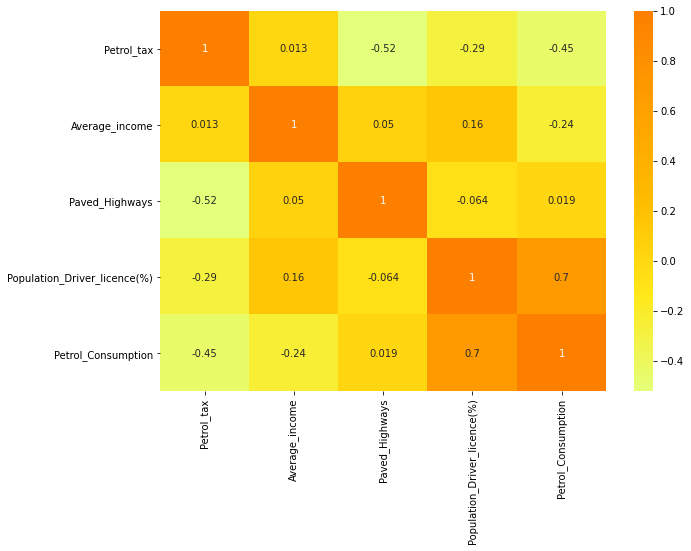

In [44]:
### view basic feature correlations in a heatmap ###
import seaborn as sns 
import matplotlib.pyplot as plt 
f, ax = plt.subplots(1, 1, figsize = (10, 7))
print('--- feature correlations heatmap ---')
sns.heatmap(df.corr() , cmap = 'Wistia' , annot = True)

--- scatter plots ---


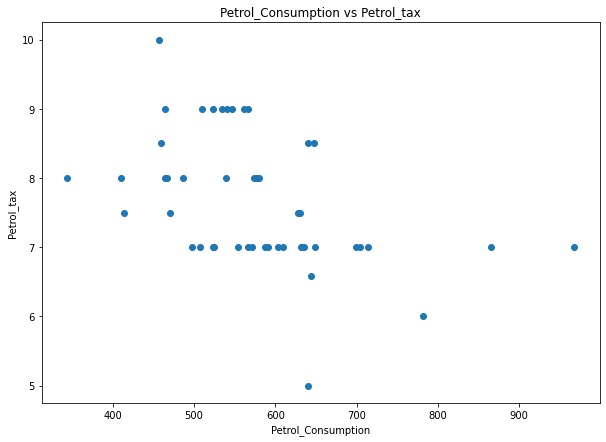

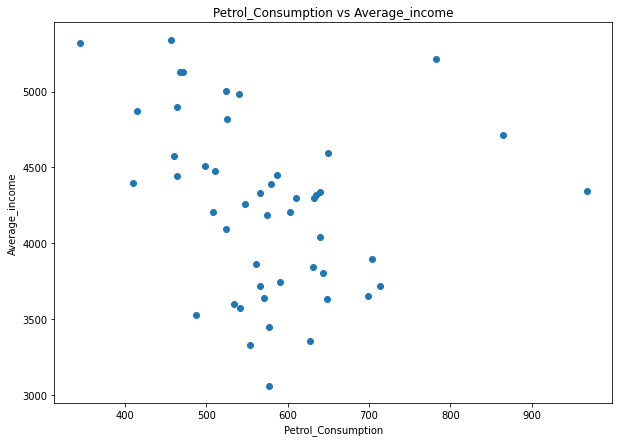

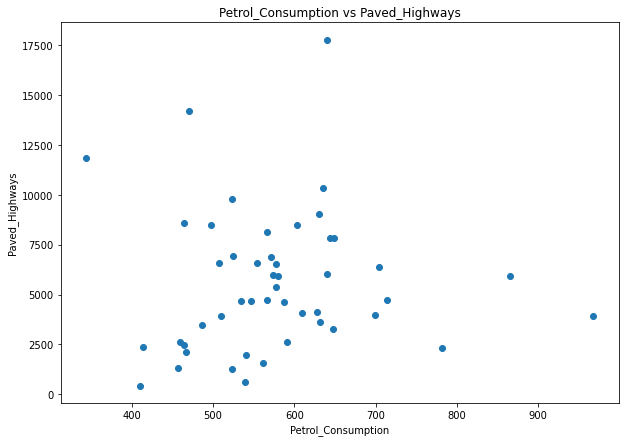

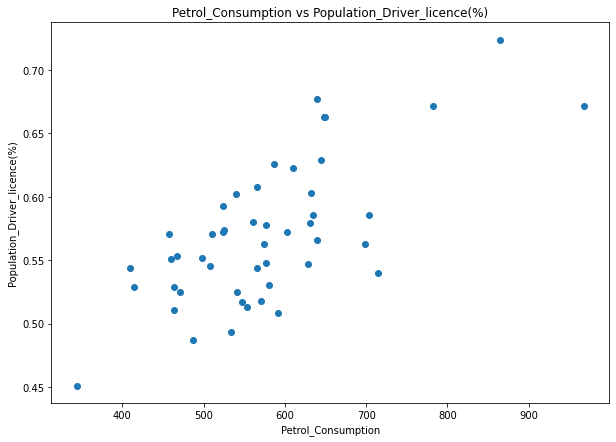

In [45]:
### view scatter plots for each feature vs. target ###
import matplotlib.pyplot as plt 
target_ = 'Petrol_Consumption' # set the target
features_ = df.iloc[:, 0:4] # set the features
print('--- scatter plots ---')
for feature in features_:
    figure = plt.figure
    f, ax = plt.subplots(1, 1, figsize = (10, 7))
    ax = plt.gca()
    ax.scatter(df[target_], df[feature])
    ax.set_xlabel(target_)
    ax.set_ylabel(feature)
    ax.set_title(f'''{target_} vs {feature}''')
    plt.show()

#### Encode + Clean + Organize


In [ ]:
### encoding not necessary with this example, all are numericals ###

<Figure size 432x288 with 0 Axes>

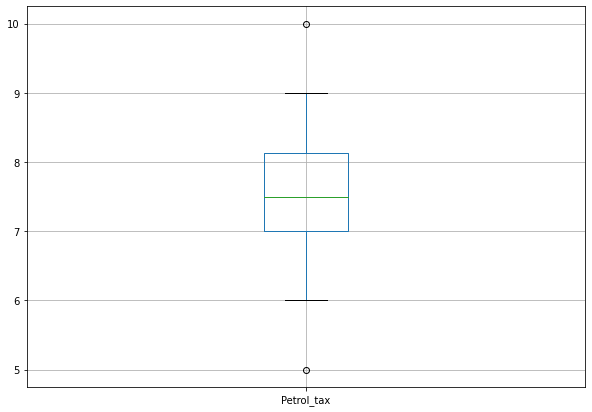

<Figure size 432x288 with 0 Axes>

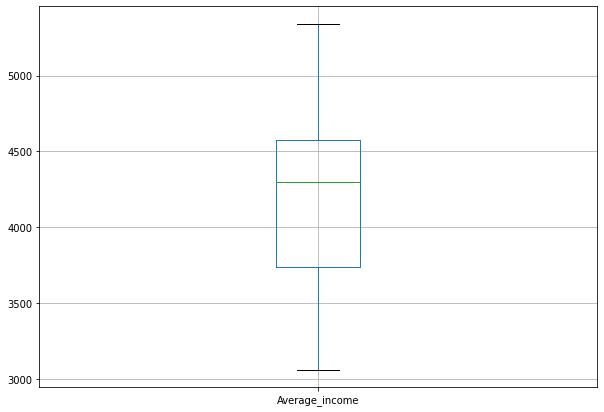

<Figure size 432x288 with 0 Axes>

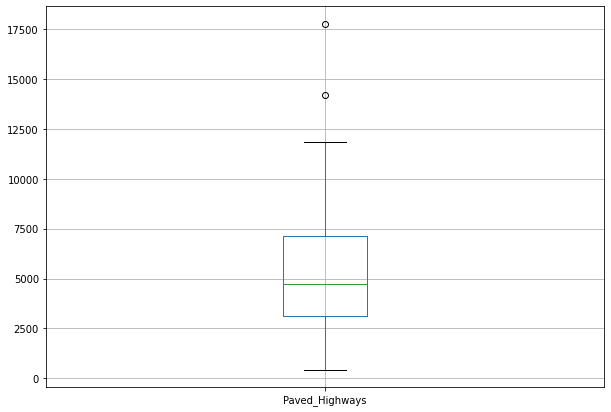

<Figure size 432x288 with 0 Axes>

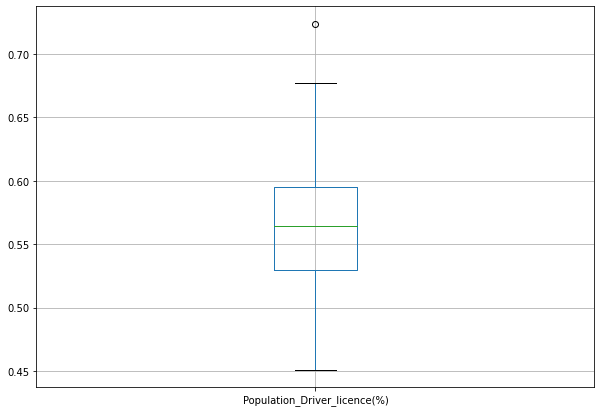

<Figure size 432x288 with 0 Axes>

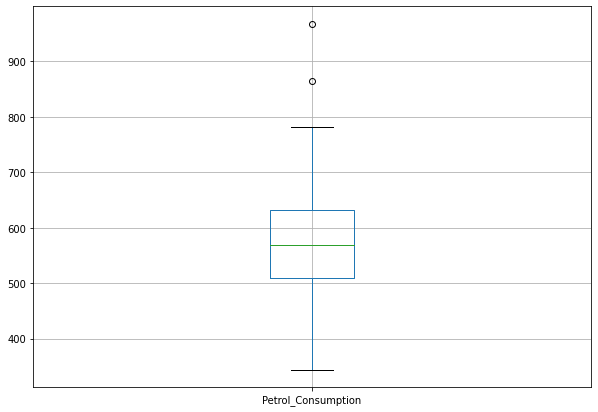

In [46]:
### check for outliers in the data ### 
import matplotlib.pyplot as plt
# view each feature in a boxplot 
for column in df:
    plt.figure() # plot figure 
    f, ax = plt.subplots(1, 1, figsize = (10, 7))
    df.boxplot([column]) # set data

In [47]:
### function to find outliers in the data ###
def outlier_zscore(data):
    global outliers,zscore
    outliers = [] 
    zscore = [] 
    threshold = 3.5 # set threshold 
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std # calculate the z_score
        zscore.append(z_score) # append the score to the zscore
        if np.abs(z_score) > threshold: 
            outliers.append(i) # append z_score the outliers
    print(outliers)
    return len(outliers), outliers

In [48]:
### run each feature 'wanted' through the function ### 
print('--- possible outliers --- ')
Average_income_outliers_number, Average_income_outliers = outlier_zscore(df.Average_income)
Paved_Highways_outliers_number, Paved_Highways_outliers = outlier_zscore(df.Paved_Highways)
Population_Driver_licence_outliers_number, Population_Driver_licence_outliers = outlier_zscore(df['Population_Driver_licence(%)'])
Petrol_Consumption_outliers_number, Petrol_Consumption_outliers = outlier_zscore(df.Petrol_Consumption)

--- possible outliers --- 
[]
[17782]
[]
[968]


In [49]:
### removal of outliers per feature ###
for num, i in enumerate(df['Paved_Highways']): 
    if i in Paved_Highways_outliers:
        df['Paved_Highways'][num] = 14800 # choose replacement score
for num, i in enumerate(df['Petrol_Consumption']): 
    if i in Petrol_Consumption_outliers:
        df['Petrol_Consumption'][num] = 875 # choose replacement score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Single Random Forest Regression Model
 - GridSearch CV
 - RandomSearch CV

In [50]:
### copy the data frame ###
f1 = df.copy()

In [51]:
### split the data into features & target sets ###
X = df1.iloc[:, 3:4].values # set the features
y = df1.iloc[:, 4].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape)  
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (48, 1)
y shape: (48,)


In [52]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20

In [53]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [54]:
### random forest regression model ###
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
model = RandomForestRegressor(
                              n_estimators=20, # 20 estimators, # of trees
                              random_state=0
                              )
print('--- model runtime --- ')
%time model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"])
df_final = pd.concat([y_test_df , y_pred_df] , axis=1)
print('--- real values vs predicted values ---')
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') 
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 24.2 ms, sys: 3 µs, total: 24.2 ms
Wall time: 24.4 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0          534            538.00
1          410            553.10
2          577            588.40
3          571            543.55
4          577            592.15
--- model metrics ---
mean absolute error: 53.08583333333333
mean squared error: 4879.798590277777
root mean squared error: 69.85555518552391
r2 score : 0.16719027922842844
model score: 0.8676962465839522
model accuracy: 16.719027922842844%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


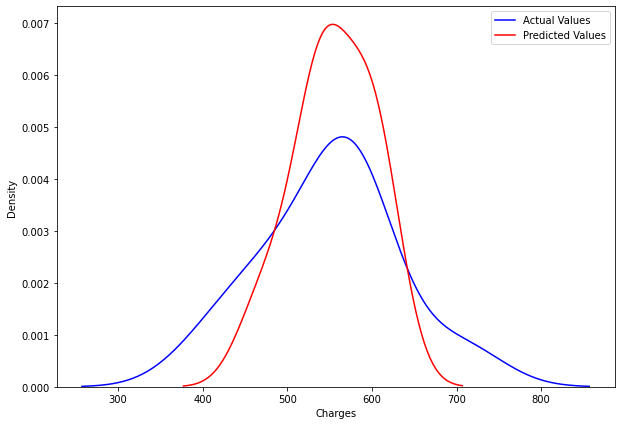

In [55]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

###### GridSearch CV

In [56]:
### copy the data frame ###
df2 = df.copy()

In [57]:
### split the data into features & target sets ###
# for single regression select 1 feature
X = df2.iloc[:, 3:4].values # set the features
y = df2.iloc[:, 4].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) 
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (48, 1)
y shape: (48,)


In [58]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 

In [59]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [63]:
### random forest regressor + gridsearch CV model ###
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model1 = RandomForestRegressor()
param_grid = {  # create the param grid 
            'n_estimators': [20, 100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_leaf_nodes' : [2, 6, 10],
            'max_depth' : [5, 15, 25],
            'min_samples_split' : [2, 10, 15],
            # 'bootstrap': [True, False],
            # 'ccp_alpha': [0.0, 0.25, 0.50],
            # 'criterion': 'mse',
            # 'max_samples': [2, 10, 15],
            # 'min_impurity_decrease': [0.0, 0.25, 0.50],
            # 'min_impurity_split': [2, 10, 15],
            # 'min_samples_leaf': [1, 5, 10],
            # 'min_weight_fraction_leaf': [0.0, 0.25, 0.50],
            # 'n_jobs': [1, 2, 5],
            # 'oob_score': [True, False],
            # 'random_state': [0, 2, 4],
            # 'verbose': [1],
            # 'warm_start': [True, False] 
              }
CV_rfc = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3) 
print('--- model runtime --- ')
%time CV_rfc.fit(X_train, y_train)
print('--- best params --- ')
CV_rfc.best_params_

--- model runtime --- 
CPU times: user 1min 27s, sys: 329 ms, total: 1min 27s
Wall time: 1min 28s
--- best params --- 


{'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 6,
 'min_samples_split': 15,
 'n_estimators': 20}

In [64]:
### random forest regression model + grid best params ###
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
model1 = RandomForestRegressor(
                                max_depth= 5,
                                max_features= 'log2',
                                max_leaf_nodes= 6,
                                min_samples_split= 15,
                                n_estimators= 20
                               )
print('--- model runtime --- ')
%time model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"])
df_final = pd.concat([y_test_df , y_pred_df] , axis=1)
print('--- real values vs predicted values ---')
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---')
from sklearn import metrics
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model1.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 23.2 ms, sys: 1.01 ms, total: 24.2 ms
Wall time: 23.9 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0          534        499.714816
1          410        533.344177
2          577        525.725755
3          571        505.632463
4          577        591.871952
--- model metrics ---
mean absolute error: 58.20908582734703
mean squared error: 4588.990783683718
root mean squared error: 67.7420901927577
r2 score : 0.21682092765115468
model score: 0.6147089179260985
model accuracy: 21.682092765115467%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


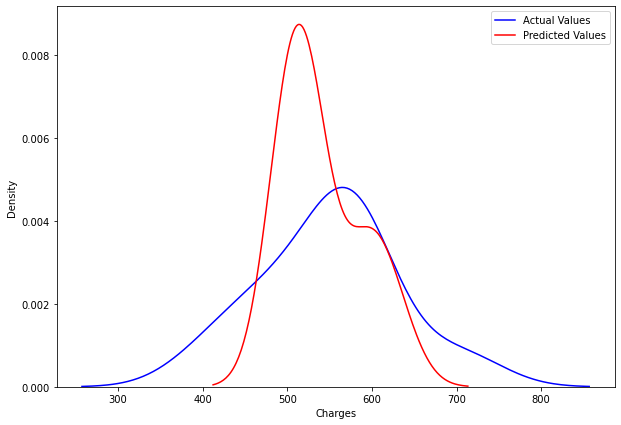

In [65]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

###### RandomizedSearch CV

In [66]:
### copy the data frame ###
df3 = df.copy()

In [67]:
### split the data into features & target sets ###
# for single regression select the 1 feature
X = df3.iloc[:, 3:4].values # set the features
y = df3.iloc[:, 4].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) # show the shape 
print('y shape:', y.shape) # show the shape 

--- data shapes --- 
X shape: (48, 1)
y shape: (48,)


In [68]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20

In [69]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [72]:
### random forest regressor + randomized search CV model ###
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
model2 = RandomForestRegressor()
param_grid = {  # create the param grid 
            'n_estimators': [20, 100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_leaf_nodes' : [2, 6, 10],
            'max_depth' : [5, 15, 25],
            'min_samples_split' : [2, 10, 15],
            # 'bootstrap': [True, False],
            # 'ccp_alpha': [0.0, 0.25, 0.50],
            # 'criterion': 'mse',
            # 'max_samples': [2, 10, 15],
            # 'min_impurity_decrease': [0.0, 0.25, 0.50],
            # 'min_impurity_split': [2, 10, 15],
            # 'min_samples_leaf': [1, 5, 10],
            # 'min_weight_fraction_leaf': [0.0, 0.25, 0.50],
            # 'n_jobs': [1, 2, 5],
            # 'oob_score': [True, False],
            # 'random_state': [0, 2, 4],
            # 'verbose': [1],
            # 'warm_start': [True, False] 
              }
CV_rfc = RandomizedSearchCV(model2, param_grid, cv=3) 
print('--- model runtime --- ')
%time CV_rfc.fit(X_train, y_train)
print('--- best params --- ')
CV_rfc.best_params_

--- model runtime --- 
CPU times: user 4.15 s, sys: 22.3 ms, total: 4.17 s
Wall time: 4.17 s
--- best params --- 


{'max_depth': 25,
 'max_features': 'sqrt',
 'max_leaf_nodes': 6,
 'min_samples_split': 15,
 'n_estimators': 20}

In [73]:
### random forest regression model + randomized best params ###
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
model2 = RandomForestRegressor(
                                max_depth= 25,
                                max_features= 'sqrt',
                                max_leaf_nodes= 6,
                                min_samples_split= 15,
                                n_estimators= 20
                              )
print('--- model runtime --- ')
%time model2.fit(X_train, y_train)
y_pred = model2.predict(X_test) 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"])
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) 
print('--- real values vs predicted values ---')
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---')
from sklearn import metrics
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model2.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 28.8 ms, sys: 0 ns, total: 28.8 ms
Wall time: 28.8 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0          534        517.864384
1          410        547.128390
2          577        556.005121
3          571        514.699384
4          577        594.183359
--- model metrics ---
mean absolute error: 56.98182253646767
mean squared error: 4875.660156101499
root mean squared error: 69.82592753484552
r2 score : 0.1678965641594592
model score: 0.6192647461340599
model accuracy: 16.78965641594592%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


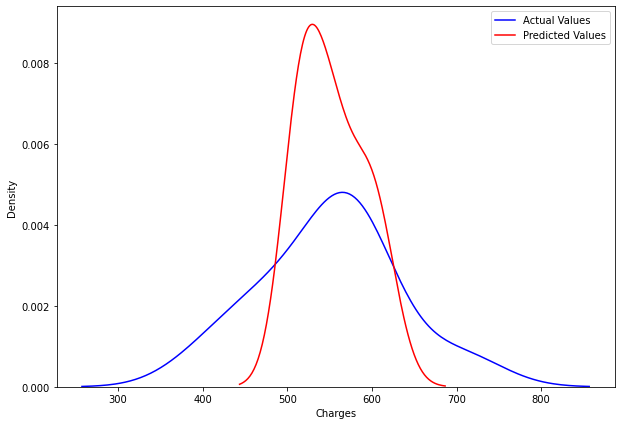

In [74]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

#### Multi Linear Regression
 - GridSearchCV
 - RandomizedSearch CV

In [75]:
### copy the data frame ###
df4 = df.copy()

In [76]:
### split the data into features & target sets ###
# for multi regression select all the features wanted
X = df4.iloc[:, 0:4].values # set the features
y = df4.iloc[:, 4].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) 
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (48, 4)
y shape: (48,)


In [77]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 

In [78]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [79]:
### random forest regression model ###
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
model3 = RandomForestRegressor(
                              n_estimators=20, # 20 estimators, # of trees
                              random_state=0
                              )
print('--- model runtime --- ')
%time model3.fit(X_train, y_train)
y_pred = model3.predict(X_test) 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"])
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) 
print('--- real values vs predicted values ---')
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---')
from sklearn import metrics
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model3.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 24.8 ms, sys: 992 µs, total: 25.8 ms
Wall time: 25.6 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0          534            574.10
1          410            509.95
2          577            604.80
3          571            589.75
4          577            625.40
--- model metrics ---
mean absolute error: 51.794999999999995
mean squared error: 4125.500749999998
root mean squared error: 64.23006110848719
r2 score : 0.2959223492347395
model score: 0.9430841381500261
model accuracy: 29.59223492347395%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


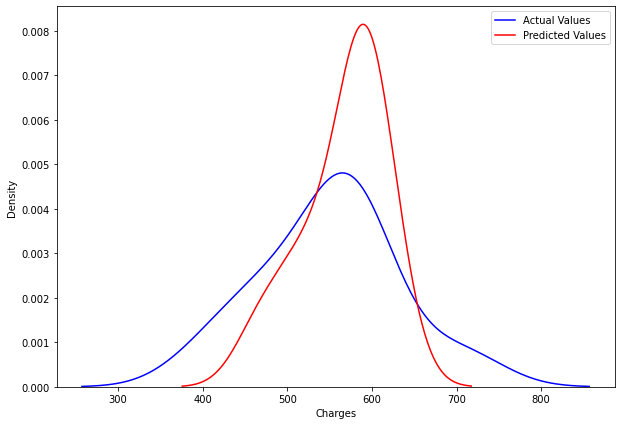

In [80]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

##### GridSearch CV

In [81]:
### copy the data frame ###
df5 = df.copy()

In [82]:
### split the data into features & target sets ###
# for multi regression select all the features wanted
X = df5.iloc[:, 0:4].values # set the features
y = df5.iloc[:, 4].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape)
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (48, 4)
y shape: (48,)


In [83]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20

In [84]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [86]:
### random forest regressor + gridsearch CV model ###
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model4 = RandomForestRegressor()
param_grid = {  # create the param grid 
            'n_estimators': [20, 100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_leaf_nodes' : [2, 6, 10],
            'max_depth' : [5, 15, 25],
            'min_samples_split' : [2, 10, 15],
            # 'bootstrap': [True, False],
            # 'ccp_alpha': [0.0, 0.25, 0.50],
            # 'criterion': 'mse',
            # 'max_samples': [2, 10, 15],
            # 'min_impurity_decrease': [0.0, 0.25, 0.50],
            # 'min_impurity_split': [2, 10, 15],
            # 'min_samples_leaf': [1, 5, 10],
            # 'min_weight_fraction_leaf': [0.0, 0.25, 0.50],
            # 'n_jobs': [1, 2, 5],
            # 'oob_score': [True, False],
            # 'random_state': [0, 2, 4],
            # 'verbose': [1],
            # 'warm_start': [True, False] 
              }
CV_rfc = GridSearchCV(estimator=model4, param_grid=param_grid, cv=3) 
print('--- model runtime --- ')
%time CV_rfc.fit(X_train, y_train)
print('--- best params --- ')
CV_rfc.best_params_

--- model runtime --- 
CPU times: user 1min 27s, sys: 338 ms, total: 1min 28s
Wall time: 1min 28s
--- best params --- 


{'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_split': 2,
 'n_estimators': 200}

In [87]:
### random forest regression model + grid best params ###
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
model4 = RandomForestRegressor(
                                max_depth= 5,
                                max_features= 'log2',
                                max_leaf_nodes= 10,
                                min_samples_split= 2,
                                n_estimators= 200
                               )
print('--- model runtime --- ')
%time model4.fit(X_train, y_train) # fit the data on the model 
y_pred = model4.predict(X_test) # create the prediction from the poly data 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) # create the predicitons data frame 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) # create the real values  data frame
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) # concat merge the data frames 
print('--- real values vs predicted values ---') # get the intercept
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') # get the intercept
from sklearn import metrics
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model4.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 224 ms, sys: 5.95 ms, total: 230 ms
Wall time: 237 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0          534        567.158334
1          410        507.747119
2          577        597.970383
3          571        590.480813
4          577        607.036215
--- model metrics ---
mean absolute error: 44.887380789919064
mean squared error: 3303.1903062720207
root mean squared error: 57.4733878092463
r2 score : 0.43626177479895334
model score: 0.9183790834434141
model accuracy: 43.62617747989533%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


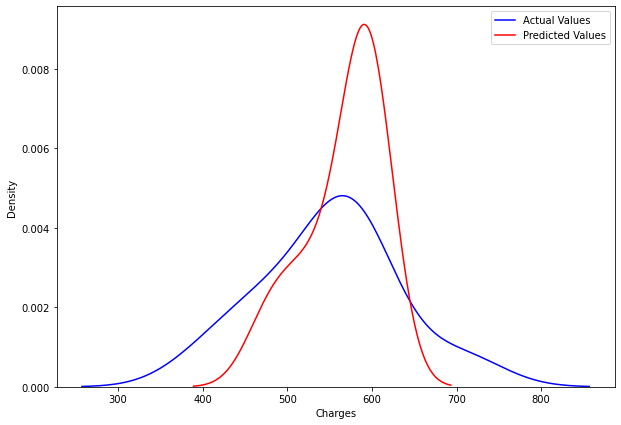

In [88]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

##### RandomizedSearch CV

In [89]:
### copy the data frame ###
df6 = df.copy()

In [90]:
### split the data into features & target sets ###
# for multi regression select all the features wanted
X = df6.iloc[:, 0:4].values # set the features
y = df6.iloc[:, 4].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) 
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (48, 4)
y shape: (48,)


In [91]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 

In [92]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [93]:
### random forest regressor + random search CV model ###
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
model5 = RandomForestRegressor()
param_grid = {  # create the param grid 
            'n_estimators': [20, 100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_leaf_nodes' : [2, 6, 10],
            'max_depth' : [5, 15, 25],
            'min_samples_split' : [2, 10, 15],
            # 'bootstrap': [True, False],
            # 'ccp_alpha': [0.0, 0.25, 0.50],
            # 'criterion': 'mse',
            # 'max_samples': [2, 10, 15],
            # 'min_impurity_decrease': [0.0, 0.25, 0.50],
            # 'min_impurity_split': [2, 10, 15],
            # 'min_samples_leaf': [1, 5, 10],
            # 'min_weight_fraction_leaf': [0.0, 0.25, 0.50],
            # 'n_jobs': [1, 2, 5],
            # 'oob_score': [True, False],
            # 'random_state': [0, 2, 4],
            # 'verbose': [1],
            # 'warm_start': [True, False] 
              }
CV_rfc = RandomizedSearchCV(model5, param_grid, cv=3) 
print('--- model runtime --- ')
%time CV_rfc.fit(X_train, y_train)
print('--- best params --- ')
CV_rfc.best_params_

--- model runtime --- 
CPU times: user 3.49 s, sys: 20.6 ms, total: 3.51 s
Wall time: 3.52 s
--- best params --- 


{'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [94]:
### random forest regression model + random best params ###
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
model5 = RandomForestRegressor(
                                max_depth= 5,
                                max_features= 'log2',
                                max_leaf_nodes= 10,
                                min_samples_split= 2,
                                n_estimators= 100
                               )
print('--- model runtime --- ')
%time model5.fit(X_train, y_train) # fit the data on the model 
y_pred = model5.predict(X_test) # create the prediction from the poly data 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) # create the predicitons data frame 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) # create the real values  data frame
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) # concat merge the data frames 
print('--- real values vs predicted values ---') # get the intercept
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') # get the intercept
from sklearn import metrics
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model5.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
CPU times: user 119 ms, sys: 1.98 ms, total: 121 ms
Wall time: 120 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0          534        570.201049
1          410        503.842827
2          577        595.202453
3          571        592.311209
4          577        601.593832
--- model metrics ---
mean absolute error: 46.05270957729062
mean squared error: 3175.0675506992857
root mean squared error: 56.34773776026226
r2 score : 0.4581278158494181
model score: 0.9284786022052182
model accuracy: 45.81278158494181%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


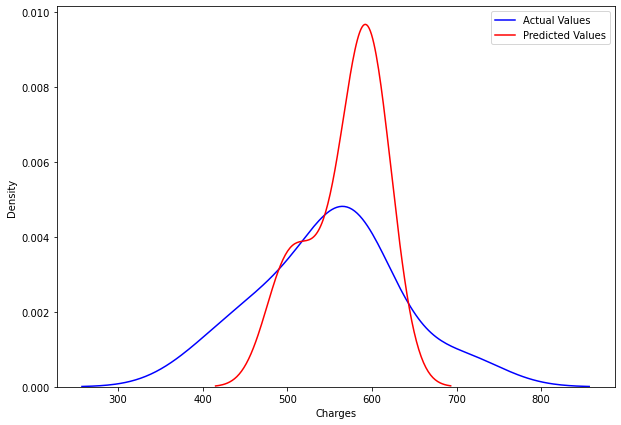

In [95]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()